<a href="https://colab.research.google.com/github/tonywangs/open-police-project/blob/main/RI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import math
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv("/content/drive/MyDrive/police_project.csv")

In [10]:
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


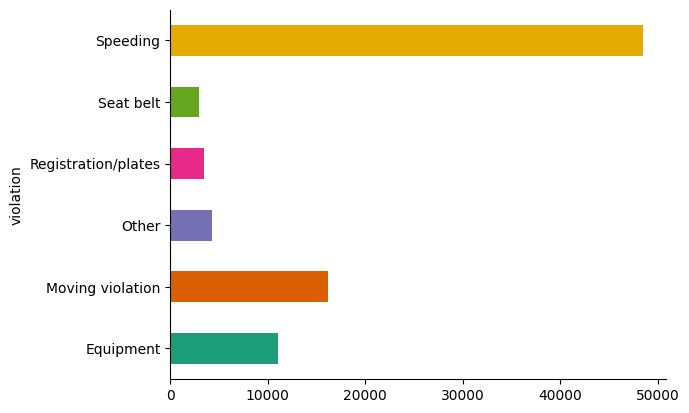

In [11]:
# @title violation

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('violation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

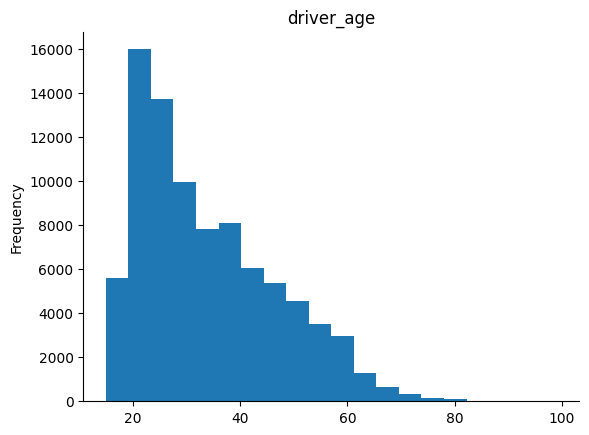

In [ ]:
# @title driver_age

from matplotlib import pyplot as plt
data['driver_age'].plot(kind='hist', bins=20, title='driver_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
# Calculate descriptive statistics for numerical fields
descriptive_stats = data.describe()

# Specifically focus on driver age
driver_age_stats = descriptive_stats.loc[:, ['driver_age']]

descriptive_stats, driver_age_stats

(       county_name  driver_age_raw    driver_age
 count          0.0    86414.000000  86120.000000
 mean           NaN     1970.491228     34.011333
 std            NaN      110.914909     12.738564
 min            NaN        0.000000     15.000000
 25%            NaN     1967.000000     23.000000
 50%            NaN     1980.000000     31.000000
 75%            NaN     1987.000000     43.000000
 max            NaN     8801.000000     99.000000,
          driver_age
 count  86120.000000
 mean      34.011333
 std       12.738564
 min       15.000000
 25%       23.000000
 50%       31.000000
 75%       43.000000
 max       99.000000)

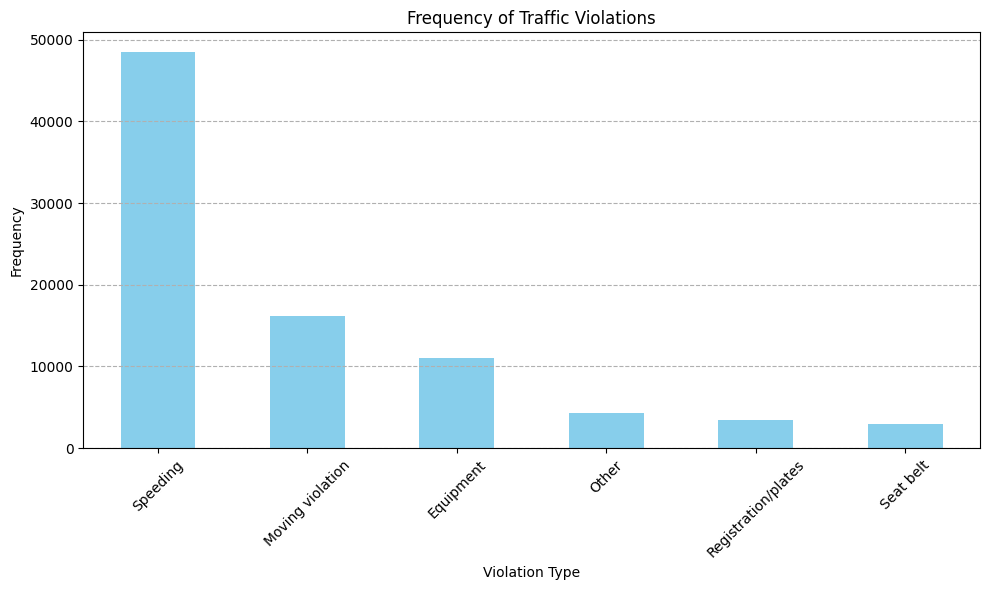

In [14]:
import matplotlib.pyplot as plt

# Calculate the frequency of each violation
violation_counts = data['violation'].value_counts()

# Generate a bar chart for the violations
plt.figure(figsize=(10, 6))
violation_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Traffic Violations')
plt.xlabel('Violation Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

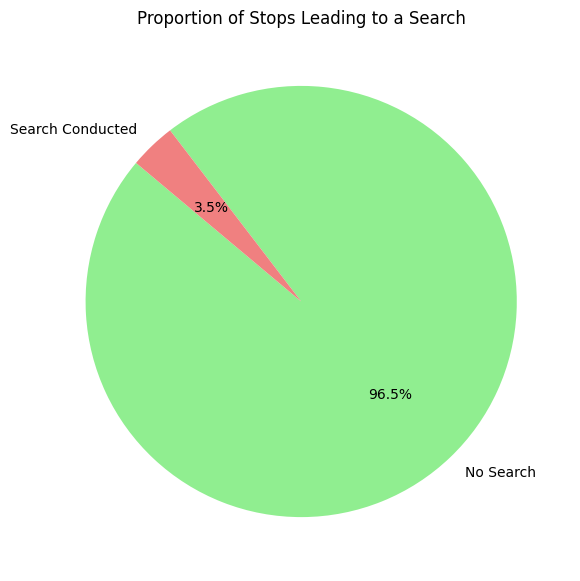

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [15]:
# Calculate the proportion of stops that led to a search
search_proportion = data['search_conducted'].value_counts(normalize=True)

# Generate a pie chart for the proportion of stops that led to a search
plt.figure(figsize=(7, 7))
search_proportion.plot(kind='pie', labels=['No Search', 'Search Conducted'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Stops Leading to a Search')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts

plt.show()

search_proportion


In [16]:
# Filter the dataset for stops that resulted in a search
search_data = data[data['search_conducted'] == True]

# Calculate the frequency of each search type
search_type_counts = search_data['search_type'].value_counts()

# Calculate the proportion of searches that resulted in an arrest
arrest_rate = search_data['is_arrested'].value_counts(normalize=True)

# Calculate the proportion of searches that were drug-related
drug_related_rate = search_data['drugs_related_stop'].value_counts(normalize=True)

search_type_counts, arrest_rate, drug_related_rate


(Incident to Arrest                                          1219
 Probable Cause                                               891
 Inventory                                                    220
 Reasonable Suspicion                                         197
 Protective Frisk                                             161
 Incident to Arrest,Inventory                                 129
 Incident to Arrest,Probable Cause                            106
 Probable Cause,Reasonable Suspicion                           75
 Incident to Arrest,Inventory,Probable Cause                   34
 Incident to Arrest,Protective Frisk                           33
 Probable Cause,Protective Frisk                               33
 Inventory,Probable Cause                                      22
 Incident to Arrest,Reasonable Suspicion                       13
 Inventory,Protective Frisk                                    11
 Incident to Arrest,Inventory,Protective Frisk                 11
 Protectiv

In [17]:
from scipy import stats
import numpy as np

# Filter data for relevant columns
search_data_gender = data[['search_conducted', 'driver_gender']]

# Calculate search rates for male and female drivers
search_rates = search_data_gender.groupby('driver_gender').mean()

# Perform a chi-square test for independence
contingency_table = pd.crosstab(search_data_gender['driver_gender'], search_data_gender['search_conducted'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Calculate confidence intervals for the proportion of searches
# For simplicity, we'll use a normal approximation which is reasonable given a large sample size
def proportion_confidence_interval(count, n, confidence_level=0.95):
    proportion = count / n
    z = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z * np.sqrt((proportion * (1 - proportion)) / n)
    return (proportion - margin_of_error, proportion + margin_of_error)

male_search_count = contingency_table.loc['M', True]
female_search_count = contingency_table.loc['F', True]
total_male_stops = search_data_gender['driver_gender'].value_counts()['M']
total_female_stops = search_data_gender['driver_gender'].value_counts()['F']

male_ci = proportion_confidence_interval(male_search_count, total_male_stops)
female_ci = proportion_confidence_interval(female_search_count, total_female_stops)

search_rates, chi2, p_value, male_ci, female_ci


(               search_conducted
 driver_gender                  
 F                      0.020033
 M                      0.043326,
 260.02171993380176,
 1.6973902964935056e-58,
 (0.04173507967942759, 0.04491727742368076),
 (0.018242186089027893, 0.021824165831349805))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Prepare data for logistic regression
# Drop rows with any missing values in the relevant columns to simplify the analysis
logistic_data = data[['search_conducted', 'driver_gender', 'driver_age', 'driver_race']].dropna()

# Encode categorical variables
logistic_data = pd.get_dummies(logistic_data, columns=['driver_gender', 'driver_race'], drop_first=True)

# Separate predictors and response
X = logistic_data.drop('search_conducted', axis=1)
y = logistic_data['search_conducted']

# Standardize the age column
scaler = StandardScaler()
X['driver_age'] = scaler.fit_transform(X[['driver_age']])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on test set
y_pred = logistic_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
model_coef = pd.Series(logistic_model.coef_[0], index=X.columns)

accuracy, model_coef


(0.9605759739882715,
 driver_age             -0.328875
 driver_gender_M         0.787001
 driver_race_Black       0.955582
 driver_race_Hispanic    0.878768
 driver_race_Other      -0.393518
 driver_race_White       0.176154
 dtype: float64)

In [19]:
from scipy.stats import beta

# Total number of stops and number of searches conducted
n_stops = len(logistic_data)
n_searches = logistic_data['search_conducted'].sum()

# Prior parameters for Beta distribution (using a relatively uninformative prior)
alpha_prior = 1
beta_prior = 1

# Posterior parameters are the prior parameters plus the observed successes and failures
alpha_posterior = alpha_prior + n_searches
beta_posterior = beta_prior + n_stops - n_searches

# Generate posterior distribution
posterior = beta(alpha_posterior, beta_posterior)

# Calculate the 95% credible interval for the posterior
credible_interval = posterior.interval(0.95)

# Mean of the posterior distribution
posterior_mean = posterior.mean()

credible_interval, posterior_mean


((0.03583795761697916, 0.03836228336953696), 0.037089937873773446)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Filter and prepare data for Multinomial Logistic Regression
multinomial_data = data[['stop_outcome', 'driver_age', 'driver_gender', 'driver_race', 'violation']].dropna()

# Encoding categorical variables
label_encoder = LabelEncoder()
multinomial_data['stop_outcome_encoded'] = label_encoder.fit_transform(multinomial_data['stop_outcome'])
multinomial_data = pd.get_dummies(multinomial_data, columns=['driver_gender', 'driver_race', 'violation'], drop_first=True)

# Separate predictors and response (encoded stop_outcome)
X_mn = multinomial_data.drop(['stop_outcome', 'stop_outcome_encoded'], axis=1)
y_mn = multinomial_data['stop_outcome_encoded']

# Standardize the age column
X_mn['driver_age'] = scaler.fit_transform(X_mn[['driver_age']])

# Split data into training and test sets for Multinomial Logistic Regression
X_mn_train, X_mn_test, y_mn_train, y_mn_test = train_test_split(X_mn, y_mn, test_size=0.2, random_state=42)

# Fit Multinomial Logistic Regression model (using 'multinomial' option in Logistic Regression)
multinomial_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multinomial_model.fit(X_mn_train, y_mn_train)

# Predict on test set
y_mn_pred = multinomial_model.predict(X_mn_test)

# Model evaluation
mn_accuracy = accuracy_score(y_mn_test, y_mn_pred)
mn_classification_report = classification_report(y_mn_test, y_mn_pred, target_names=label_encoder.classes_)

mn_accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.889334030076061

In [21]:
mn_classification_report


'                  precision    recall  f1-score   support\n\n   Arrest Driver       0.00      0.00      0.00       507\nArrest Passenger       0.00      0.00      0.00        69\n        Citation       0.89      1.00      0.94     15317\n             N/D       0.00      0.00      0.00       116\n       No Action       0.00      0.00      0.00       112\n         Warning       0.00      0.00      0.00      1102\n\n        accuracy                           0.89     17223\n       macro avg       0.15      0.17      0.16     17223\n    weighted avg       0.79      0.89      0.84     17223\n'

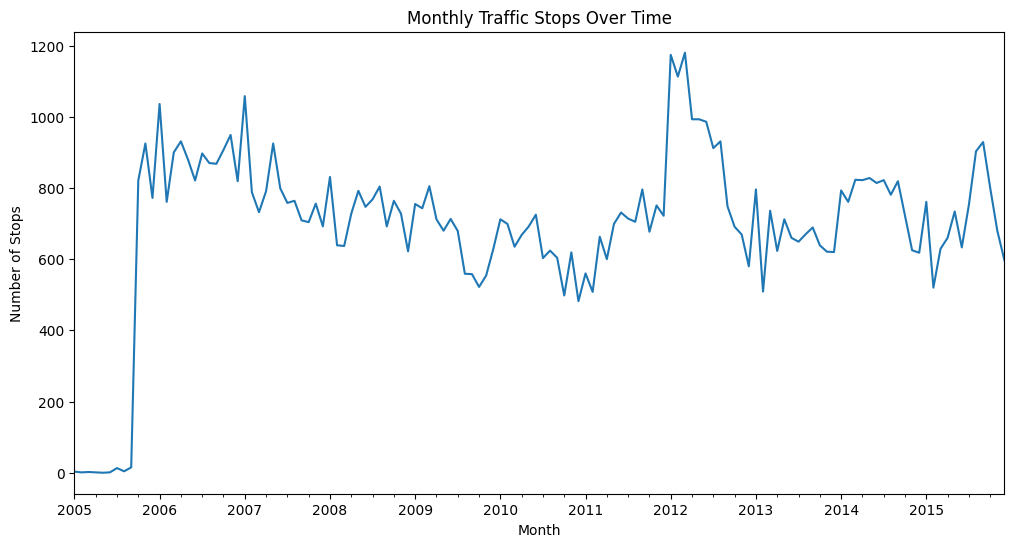

In [22]:
# Convert stop_date to datetime and set as index
data['stop_date'] = pd.to_datetime(data['stop_date'])
time_series_data = data.set_index('stop_date')

# Aggregate data by month for trend analysis
monthly_stops = time_series_data.resample('M').size()

# Plot the trend of traffic stops over time
plt.figure(figsize=(12, 6))
monthly_stops.plot(title='Monthly Traffic Stops Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Stops')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Selecting features and target for the ML model
features = ['driver_age', 'driver_gender', 'driver_race', 'violation']
X = data[features].dropna()
y = data.loc[X.index, 'search_conducted']

# Encoding categorical variables
categorical_features = ['driver_gender', 'driver_race', 'violation']
one_hot_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)],
    remainder='passthrough')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_pipeline.predict(X_test)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf

(0.9604598502003135, 0.0, 0.0, 0.0)

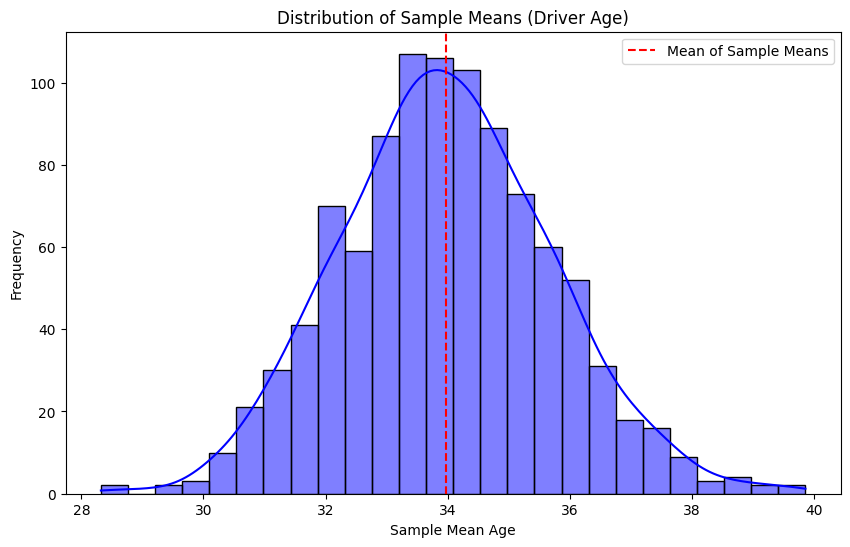

(33.9734, 34.011333023687875)

In [24]:
import numpy as np
import seaborn as sns

# Extract the 'driver_age' column, dropping any missing values
driver_ages = data['driver_age'].dropna()

# Define the number of samples and the sample size
n_samples = 1000
sample_size = 50

# Initialize a list to store sample means
sample_means = []

# Generate samples and compute their means
for _ in range(n_samples):
    sample = np.random.choice(driver_ages, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='blue')
plt.title('Distribution of Sample Means (Driver Age)')
plt.xlabel('Sample Mean Age')
plt.ylabel('Frequency')
plt.axvline(x=np.mean(sample_means), color='red', linestyle='--', label='Mean of Sample Means')
plt.legend()
plt.show()

# Display the mean of sample means and the population mean
np.mean(sample_means), driver_ages.mean()


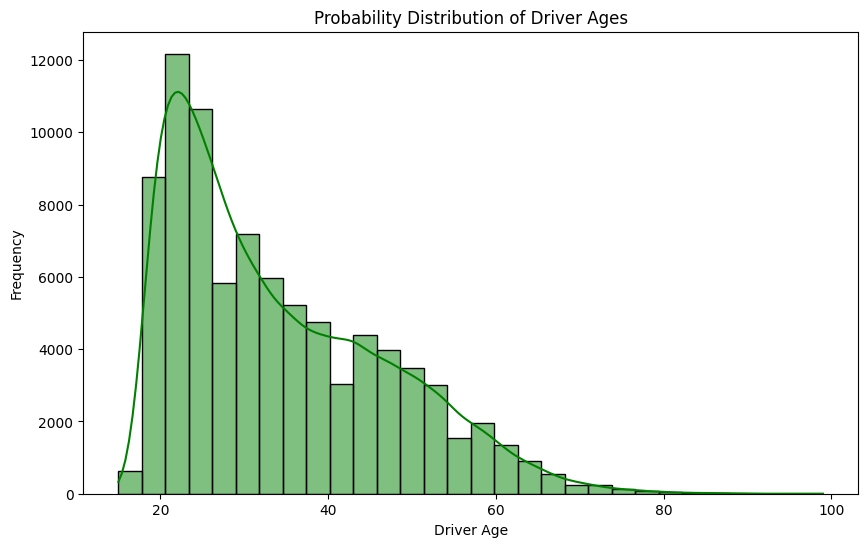

In [25]:
# Plot the distribution of driver ages
plt.figure(figsize=(10, 6))
sns.histplot(driver_ages, kde=True, bins=30, color='green')
plt.title('Probability Distribution of Driver Ages')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.show()

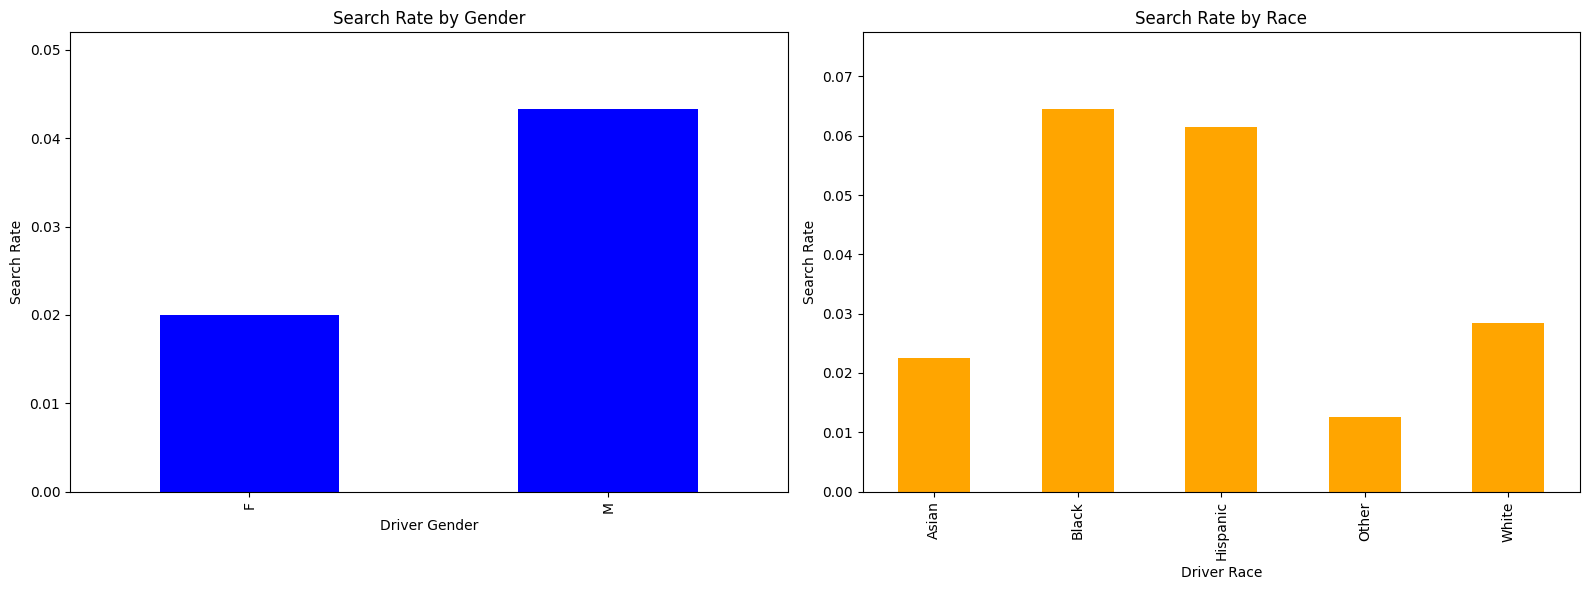

In [27]:
# Calculate the search rate by gender
search_rate_gender = data.groupby('driver_gender')['search_conducted'].mean()

# Calculate the search rate by race
search_rate_race = data.groupby('driver_race')['search_conducted'].mean()

# Plotting the search rates by gender and race
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Search rates by gender
search_rate_gender.plot(kind='bar', color='blue', ax=ax[0])
ax[0].set_title('Search Rate by Gender')
ax[0].set_xlabel('Driver Gender')
ax[0].set_ylabel('Search Rate')
ax[0].set_ylim(0, max(search_rate_gender) * 1.2)

# Search rates by race
search_rate_race.plot(kind='bar', color='orange', ax=ax[1])
ax[1].set_title('Search Rate by Race')
ax[1].set_xlabel('Driver Race')
ax[1].set_ylabel('Search Rate')
ax[1].set_ylim(0, max(search_rate_race) * 1.2)

plt.tight_layout()
plt.show()